In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
import pandas as pd

consumer_key = 'CgDFboEAc8gyF9KtotIJQ5SXI'
consumer_secret = 'q6KT8xyEdo1kA2c4eW7dMEN65zsPwH0M3MmnFhSVhcAblM13Yo'
access_token = '2383452830-ycW1HhTlyeydlW7cML4eQDMBOvOv8Mn93c1kQrJ'
access_secret = 'jxyJEGR25J80Osvya03YgGeuXtT6mpymxZNqy7XGRf9k1'

auth = OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True)

tweets = api.search(q="#RestWellBTS", count=500)

message,favorite_count,retweet_count,created_at,user_name,followers_count = [],[],[],[],[],[]

for tweet in tweepy.Cursor(api.search, q="#RestWellBTS", rpp=100, count=20, result_type="recent", include_entities=True, lang="en").items(100):
    message.append(tweet.text)
    favorite_count.append(tweet.favorite_count)
    retweet_count.append(tweet.retweet_count)
    created_at.append(tweet.created_at)
    user_name.append(tweet.user.name)
    followers_count.append(tweet.user.followers_count)
    
list_ = {'Message': message, 
         'Favorite Count' : favorite_count,
         'Retweet Count' :retweet_count,
         'Created At' : created_at,
         'Username' : user_name,
         'Followers' : followers_count}

df = pd.DataFrame(list_)
df.to_csv("tweets RestWellBTS.csv")
df

#print(df)

In [26]:
user = api.get_user("BTS_twt")


print("Detail Pengguna")
print("Nama : ",user.name)
print("Deskripsi : ",user.description)
print("Lokasi : ",user.location)

print("20 Follower Terakhir:")
for follower in user.followers():
    print(follower.screen_name)

Detail Pengguna
Nama :  방탄소년단
Deskripsi :  Hi! We are BTS!!
Lokasi :  
20 Follower Terakhir:
DivanshiSrivas1
BlueSky72021400
aomangle3
wols_bebe
ukisho_love
tkg15_marumaru
averzer
MenchiPansoy
rosetta_lahai
VVoronins
JoeAbel53456038
FNAM8m1vndm3qYR
Kyrie_18
ananya_2k1
Shoxrux43225513
kkkhao3
Triplet42821818
jiaxin77305232
wuhuichun1
Regen72412941


In [27]:
timeline = api.home_timeline()
for tweet in timeline:
    print(f"{tweet.user.name} Rest Well BTS {tweet.text}")

Tech2 Rest Well BTS "It seems unimaginable that the Amazon rainforests with its humid ecosystems could ever catch fire without human in… https://t.co/UcEUXO3zW7
Physics & Astronomy Zone Rest Well BTS RT @ZonePhysics: Beautiful yet terrifying - Hawaii https://t.co/EVxfDpCFDv
Physics & Astronomy Zone Rest Well BTS RT @ZonePhysics: This is not sped up, this is real-time footage of a caterpillar eating a leaf-you can even here it. https://t.co/Mi7fTKPlD1
New Scientist Rest Well BTS A four-day work week could improve our health and cut carbon emissions https://t.co/aRJCNRHiAV https://t.co/2XNKxufz6E
Forbes Rest Well BTS https://t.co/Ubdfr6gyju
JobStreet Indonesia Rest Well BTS Indonesia Career Expo hadir di Pekanbaru! Catat tanggalnya ya, 28-29 Agustus. Ayo perisapkan dirimu untuk karir yan… https://t.co/m5on0pw4zs
The Wall Street Journal Rest Well BTS From @WSJopinion: The opportunity offered by biosimilars is still unfolding. But the value they can offer is clear,… https://t.co/1fF3SubHJt

In [13]:
from pandas import DataFrame
from pandas import Series

In [14]:
df =pd.read_csv('tweets RestWellBTS.csv')
df.head()

,Unnamed: 0,Message,Favorite Count,Retweet Count,Created At,Username,Followers
0,0,RT @yehbts: y’all know what time it is let’s g...,0,295,2019-08-27 04:57:13,Moonchild_JoonieWifeu,236
1,1,Just doing what #Namjoon told me to do and #Na...,0,0,2019-08-27 03:37:41,LOVELY JIMIN | BTS MAMA Bear 🌻,373
2,2,RT @JMsOnlyDimple: For anyone who may need thi...,0,3,2019-08-27 03:31:29,Joonie Namjooning my heart 💜,284
3,3,RT @starlightggukk: SO ARE Y'ALL TELLING ME TH...,0,249,2019-08-27 03:03:51,ａｓｈａｎｔｉ,132
4,4,RT @thededechan: you are my winter bear\n—\n#w...,0,76,2019-08-27 02:25:09,carol 🌸,782


In [18]:
def f(x):
    return Series(dict(Number_of_tweets = x['Message'].count(),
                        User=x['Username'].min(),
                        retweet=x['Retweet Count'].min()
                        ))

In [16]:
account_count = df.groupby('Retweet Count').apply(f)
len(account_count)
account_count

,Number_of_tweets,User,retweet
Retweet Count,,,
0,9,Hyacinƚhvs Ori 🌸♐💕,0
1,7,Alberta,1
2,2,JJ☆ot7💜,2
3,4,Jimin’s Only Dimple ☺️,3
4,3,ElmiraGuantero,4
9,3,ɢɪᴜʟɪᴀ; ꜱᴛʀᴇᴀᴍ ᴡɪɴᴛᴇʀ ʙᴇᴀʀ ᴀɴᴅ ᴇᴘʜɪᴘʜᴀɴʏ,9
13,1,제리3(본계),13
20,8,Cupcake,20
36,1,Asuna Yuuki,36


In [20]:
counts = account_count.groupby('Number_of_tweets').size()
df2 = pd.DataFrame(counts, columns = ['Size'])
df2 = df2[df2['Size']>1]
df2

,Size
Number_of_tweets,
1,21
2,3
3,2
4,2


In [21]:
account_count['retweet'].plot(kind='bar')

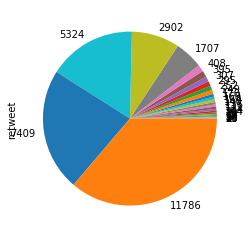

In [22]:
account_count['retweet'].plot(kind='pie')

In [23]:
%matplotlib inline

import pandas as pd
import numpy as np

iris = pd.read_csv('tweets RestWellBTS.csv', names=['sepal_length', 'sepal widht', 'petal_length', 'sepal_width', 'class'] )
iris.head()

,,sepal_length,sepal widht,petal_length,sepal_width,class
NaN,Message,Favorite Count,Retweet Count,Created At,Username,Followers
0.0,RT @yehbts: y’all know what time it is let’s gET THIS BREAD 😜🤟🏾 #RestWellBTS https://t.co/ZT40rkcfIF,0,295,2019-08-27 04:57:13,Moonchild_JoonieWifeu,236
1.0,Just doing what #Namjoon told me to do and #Namjooning the best that I can do 🥺😘😍❤️#RestWellBTS #RM #JOONIE… https://t.co/13J34yAz0j,0,0,2019-08-27 03:37:41,LOVELY JIMIN | BTS MAMA Bear 🌻,373
2.0,RT @JMsOnlyDimple: For anyone who may need this including our boys @BTS_twt 🙏💜 #RestWellBTS https://t.co/f4Qu0ArjPq,0,3,2019-08-27 03:31:29,Joonie Namjooning my heart 💜,284
3.0,RT @starlightggukk: SO ARE Y'ALL TELLING ME THAT JUNGKOOK IS CELEBRATING HIS BIRTHDAY WITH HIS FAMILY ?? I'M NOT HAPPY FOR HIM CAUSE I'M SU…,0,249,2019-08-27 03:03:51,ａｓｈａｎｔｉ,132


In [24]:
wine_reviews = pd.read_csv('tweets RestWellBTS.csv', index_col=0)
wine_reviews.head()

,Message,Favorite Count,Retweet Count,Created At,Username,Followers
0,RT @yehbts: y’all know what time it is let’s g...,0,295,2019-08-27 04:57:13,Moonchild_JoonieWifeu,236
1,Just doing what #Namjoon told me to do and #Na...,0,0,2019-08-27 03:37:41,LOVELY JIMIN | BTS MAMA Bear 🌻,373
2,RT @JMsOnlyDimple: For anyone who may need thi...,0,3,2019-08-27 03:31:29,Joonie Namjooning my heart 💜,284
3,RT @starlightggukk: SO ARE Y'ALL TELLING ME TH...,0,249,2019-08-27 03:03:51,ａｓｈａｎｔｉ,132
4,RT @thededechan: you are my winter bear\n—\n#w...,0,76,2019-08-27 02:25:09,carol 🌸,782


Text(0, 0.5, 'Sepal width')

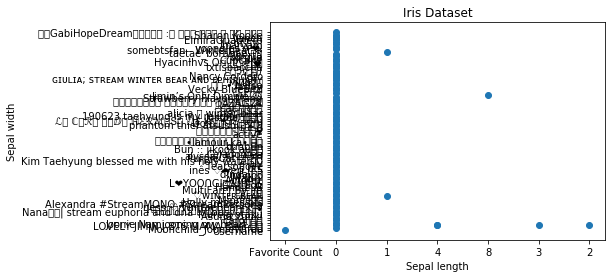

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.scatter(iris['sepal_length'], iris['sepal_width'])
ax.set_title('Iris Dataset')
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')